# Imports

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

import networkx as nx
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import plotly.graph_objects as go

# Single $\beta$ Cell Model

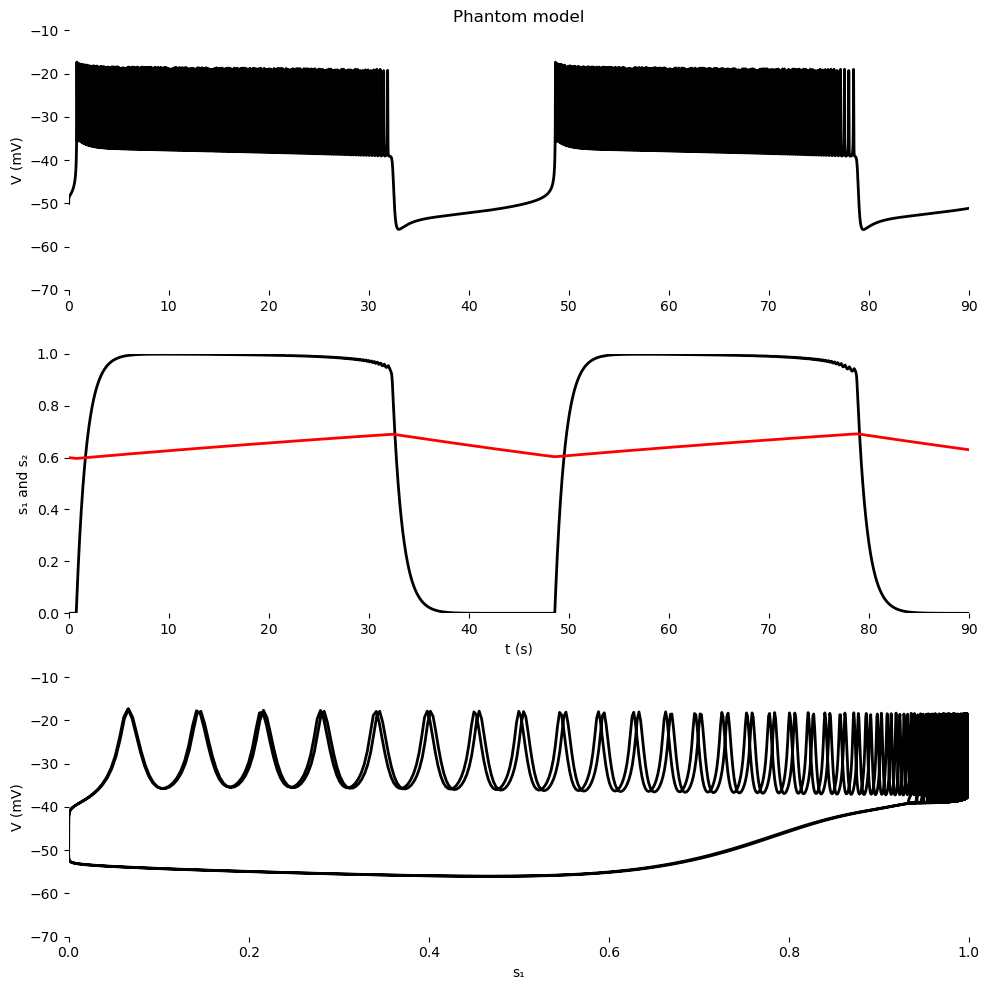

In [2]:
def singleBetaCell(t, x, gs1=5):
    # Parameters most likely to vary
    gs2 = 32
    # autos1 = 1
    # autos2 = 1
    # Other parameters
    taus1 = 1000
    taus2 = 120000
    tnbar = 9.09
    vs1 = -40
    vs2 = -42
    ss1 = 0.5
    ss2 = 0.4
    s1knot = 1
    s2knot = 1
    gl = 25
    vl = -40
    gk = 1300
    vk = -80
    gca = 280
    vca = 100
    lambda_ = 1.1
    cm = 4524
    vm = -22
    sm = 7.5
    vn = -9
    sn = 10
    # Unpack variables
    v, n, s1, s2 = x
    # Gating variables
    minf = 1.0 / (1.0 + np.exp((vm - v) / sm))
    ninf = 1.0 / (1.0 + np.exp((vn - v) / sn))
    taun = tnbar / (1.0 + np.exp((v - vn) / sn))
    s1inf = 1.0 / (1.0 + np.exp((vs1 - v) / ss1))
    s2inf = 1.0 / (1.0 + np.exp((vs2 - v) / ss2))
    # Ionic currents
    ica = gca * minf * (v - vca)
    ik = gk * n * (v - vk)
    il = gl * (v - vl)
    is1 = gs1 * s1 * (v - vk)
    is2 = gs2 * s2 * (v - vk)
    vdot = -(ica + ik + il + is1 + is2) / cm
    ndot = lambda_ * (ninf - n) / taun
    s1dot = (s1inf - s1) / taus1
    s2dot = (s2inf - s2) / taus2
    return [vdot, ndot, s1dot, s2dot]


# Call function
def call_SBC(gs1=5, v0=0.0, tmax=90000):
    tspan = (0, tmax)
    x0 = [-50, 0, 0.0, v0]
    # Solve ODE
    sol = solve_ivp(
        lambda t, x: singleBetaCell(t, x, gs1), tspan, x0, method="RK45", max_step=5.0
    )
    tsec = sol.t / 1000  # convert ms to seconds
    v, n, s1, s2 = sol.y
    # Plotting
    plt.figure(figsize=(10, 10))
    # Top panel
    plt.subplot(3, 1, 1)
    plt.plot(tsec, v, color="black", linewidth=2)
    plt.axis([0, tsec[-1], -70, -10])
    plt.title("Phantom model")
    plt.ylabel("V (mV)")
    plt.box(False)
    # Middle panel
    plt.subplot(3, 1, 2)
    plt.plot(tsec, s1, color="black", linewidth=2, label="s1")
    plt.plot(tsec, s2, color="red", linewidth=2, label="s2")
    plt.axis([0, tsec[-1], 0, 1])
    plt.xlabel("t (s)")
    plt.ylabel("s₁ and s₂")
    plt.box(False)
    # Bottom panel
    plt.subplot(3, 1, 3)
    plt.plot(s1, v, color="black", linewidth=2)
    plt.axis([0, 1, -70, -10])
    plt.xlabel("s₁")
    plt.ylabel("V (mV)")
    plt.box(False)
    plt.tight_layout()
    plt.show()
    # # Write to file
    # output = np.vstack((tsec, v, n, s1, s2)).T
    # np.savetxt("data.dat", output, fmt='%9.5f', header='t(s) v n s1 s2')


def main():
    # Example usage (you can modify gs1, v0, tmax as in Figs 2–4)
    call_SBC(gs1=5, v0=0.6, tmax=90000)


main()

## Single $\beta$ cell class

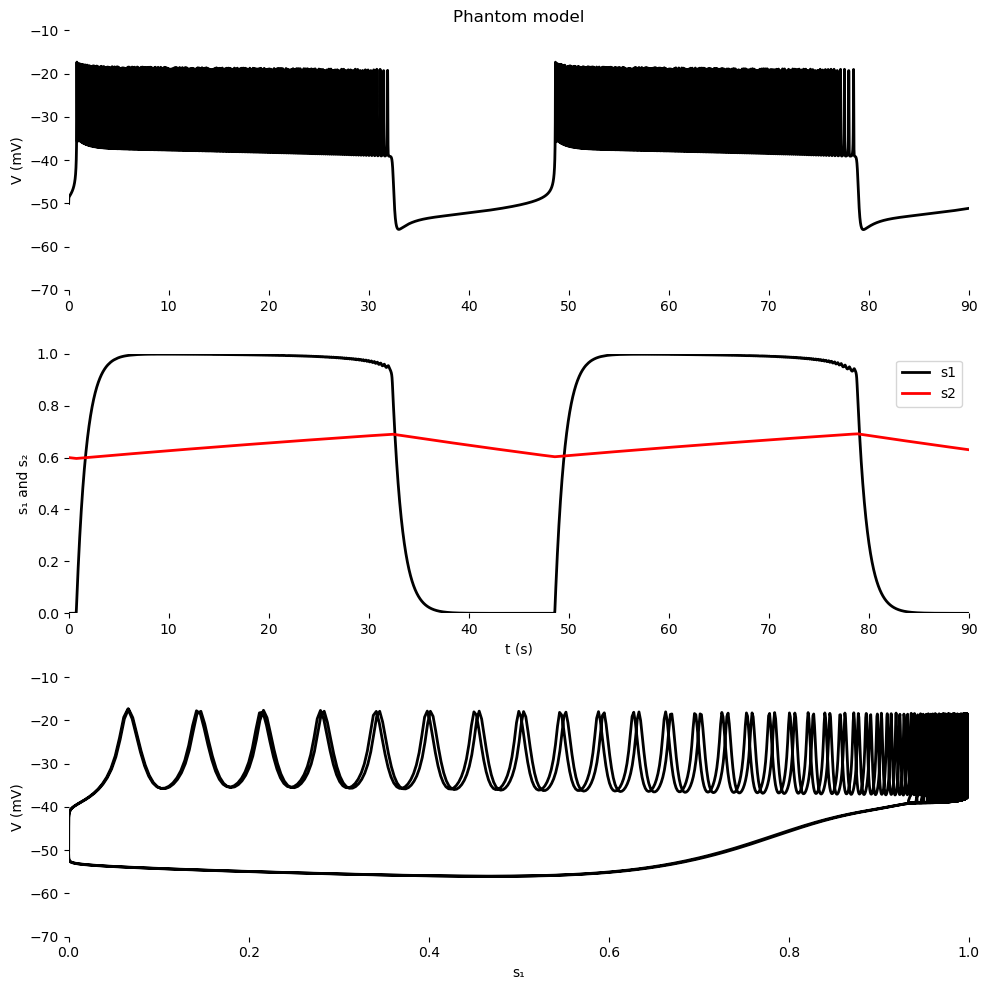

In [4]:
class SingleBetaCell:
    def __init__(
        self,
        gs1=5,
        gs2=32,
        taus1=1000,
        taus2=120000,
        tnbar=9.09,
        vs1=-40,
        vs2=-42,
        ss1=0.5,
        ss2=0.4,
        s1knot=1,
        s2knot=1,
        gl=25,
        vl=-40,
        gk=1300,
        vk=-80,
        gca=280,
        vca=100,
        lambda_=1.1,
        cm=4524,
        vm=-22,
        sm=7.5,
        vn=-9,
        sn=10,
    ):
        # Store all parameters as instance variables
        self.gs1 = gs1
        self.gs2 = gs2
        self.taus1 = taus1
        self.taus2 = taus2
        self.tnbar = tnbar
        self.vs1 = vs1
        self.vs2 = vs2
        self.ss1 = ss1
        self.ss2 = ss2
        self.s1knot = s1knot
        self.s2knot = s2knot
        self.gl = gl
        self.vl = vl
        self.gk = gk
        self.vk = vk
        self.gca = gca
        self.vca = vca
        self.lambda_ = lambda_
        self.cm = cm
        self.vm = vm
        self.sm = sm
        self.vn = vn
        self.sn = sn

    def dynamics(self, t, x):
        """Calculate the dynamics of the beta cell model"""
        # Unpack variables
        v, n, s1, s2 = x

        # Gating variables
        minf = 1.0 / (1.0 + np.exp((self.vm - v) / self.sm))
        ninf = 1.0 / (1.0 + np.exp((self.vn - v) / self.sn))
        taun = self.tnbar / (1.0 + np.exp((v - self.vn) / self.sn))
        s1inf = 1.0 / (1.0 + np.exp((self.vs1 - v) / self.ss1))
        s2inf = 1.0 / (1.0 + np.exp((self.vs2 - v) / self.ss2))

        # Ionic currents
        ica = self.gca * minf * (v - self.vca)
        ik = self.gk * n * (v - self.vk)
        il = self.gl * (v - self.vl)
        is1 = self.gs1 * s1 * (v - self.vk)
        is2 = self.gs2 * s2 * (v - self.vk)

        # Differential equations
        vdot = -(ica + ik + il + is1 + is2) / self.cm
        ndot = self.lambda_ * (ninf - n) / taun
        s1dot = (s1inf - s1) / self.taus1
        s2dot = (s2inf - s2) / self.taus2

        return np.array([vdot, ndot, s1dot, s2dot])

    def simulate(self, v0=0.0, n0=0.0, s10=0.0, s20=0.6, tmax=90000, max_step=5.0):
        """Simulate the beta cell model"""
        tspan = (0, tmax)
        x0 = [-50, n0, s10, s20]

        # Solve ODE
        sol = solve_ivp(self.dynamics, tspan, x0, method="RK45", max_step=max_step)

        return sol

    def plot_results(self, sol):
        """Plot the simulation results"""
        tsec = sol.t / 1000  # convert ms to seconds
        v, n, s1, s2 = sol.y

        plt.figure(figsize=(10, 10))

        # Top panel
        plt.subplot(3, 1, 1)
        plt.plot(tsec, v, color="black", linewidth=2)
        plt.axis([0, tsec[-1], -70, -10])
        plt.title("Phantom model")
        plt.ylabel("V (mV)")
        plt.box(False)

        # Middle panel
        plt.subplot(3, 1, 2)
        plt.plot(tsec, s1, color="black", linewidth=2, label="s1")
        plt.plot(tsec, s2, color="red", linewidth=2, label="s2")
        plt.axis([0, tsec[-1], 0, 1])
        plt.xlabel("t (s)")
        plt.ylabel("s₁ and s₂")
        plt.legend()
        plt.box(False)

        # Bottom panel
        plt.subplot(3, 1, 3)
        plt.plot(s1, v, color="black", linewidth=2)
        plt.axis([0, 1, -70, -10])
        plt.xlabel("s₁")
        plt.ylabel("V (mV)")
        plt.box(False)

        plt.tight_layout()
        plt.show()

    def run_simulation(self, gs1=5, v0=0.6, tmax=90000):
        """Run a simulation with the given parameters and plot the results"""
        # Update gs1 if needed
        self.gs1 = gs1

        # Run simulation
        sol = self.simulate(s20=v0, tmax=tmax)

        # Plot results
        self.plot_results(sol)

        return sol

    def save_data(self, sol, filename="data.dat"):
        """Save simulation results to a file"""
        tsec = sol.t / 1000  # convert ms to seconds
        v, n, s1, s2 = sol.y
        output = np.vstack((tsec, v, n, s1, s2)).T
        np.savetxt(filename, output, fmt="%9.5f", header="t(s) v n s1 s2")


def main():
    # Create instance of SingleBetaCell with default parameters
    model = SingleBetaCell()

    # Example usage (you can modify gs1, v0, tmax as in Figs 2–4)
    model.run_simulation(gs1=5, v0=0.6, tmax=90000)


main()

# Coupled $\beta$ Cells

All contacting $\beta$-cells were considered to form a functional GJ with  a strength (in pS) picked from a normal distribution of mean 40 pS and standard deviation 1 pS. Each cell may form 1–5 GJ connections with other cells, yielding a total mean GJ conductance of 40–200 pS. This is supported both by experimental and by simulation data from small clusters of dispersed human $\beta$-cells (100–200 pS; Loppini et al. (2015)) and $\beta$-cells recorded in intact mouse islets (<170 pS, Zhang et al. (2008); 50–120 unitary strength, Moreno et al. (2005); 20 pS, Perez-Armendariz et al. (1991)).

In [ ]:
class BetaCellNetwork:
    def __init__(
        self, num_cells=10, mean_gj=40, std_gj=8, min_connections=1, max_connections=6
    ):
        """
        Initialize a network of coupled beta cells

        Parameters:
        -----------
        num_cells : int
            Number of beta cells in the network
        mean_gj : float
            Mean gap junction conductance in pS
        std_gj : float
            Standard deviation of gap junction conductance in pS
        min_connections : int
            Minimum number of connections per cell
        max_connections : int
            Maximum number of connections per cell
        """
        self.num_cells = num_cells
        self.mean_gj = mean_gj  # pS
        self.std_gj = std_gj  # pS
        self.min_connections = min_connections
        self.max_connections = max_connections

        # Create individual beta cells with slightly varied parameters
        self.cells = []
        for i in range(num_cells):
            # Add slight variation to parameters
            gs1 = np.random.normal(5, 0.2)
            gs2 = np.random.normal(32, 1.0)
            self.cells.append(SingleBetaCell(gs1=gs1, gs2=gs2))

        # Create connectivity matrix (adjacency matrix with weights)
        self.create_network()

    def create_network(self):
        """Create network connectivity with gap junctions"""
        self.adjacency_matrix = np.zeros((self.num_cells, self.num_cells))
        self.graph = nx.Graph()
        self.graph.add_nodes_from(range(self.num_cells))
        self.graph.graph["cell_type"] = "beta"
        self.positions = {
            i: (np.random.rand(), np.random.rand(), np.random.rand())
            for i in range(self.num_cells)
        }

        connection_counts = {i: 0 for i in range(self.num_cells)}

        # First pass: randomly connect nodes while respecting max_connections
        attempts = 0
        max_attempts = self.num_cells * self.max_connections * 2
        while attempts < max_attempts:
            i, j = np.random.choice(self.num_cells, 2, replace=False)

            if i != j and self.adjacency_matrix[i, j] == 0:
                if connection_counts[i] < self.max_connections and connection_counts[j] < self.max_connections:
                    # Assign conductance
                    conductance = max(1, np.random.normal(self.mean_gj, self.std_gj))

                    self.adjacency_matrix[i, j] = conductance
                    self.adjacency_matrix[j, i] = conductance
                    self.graph.add_edge(i, j, weight=conductance)

                    connection_counts[i] += 1
                    connection_counts[j] += 1

            attempts += 1

        # Second pass: ensure all cells meet the minimum connection count
        for i in range(self.num_cells):
            while connection_counts[i] < self.min_connections:
                # Try to find someone to connect to
                possible_partners = [
                    j for j in range(self.num_cells)
                    if i != j and
                    self.adjacency_matrix[i, j] == 0 and
                    connection_counts[j] < self.max_connections
                ]

                if not possible_partners:
                    break  # No one left to connect to

                j = np.random.choice(possible_partners)

                conductance = max(1, np.random.normal(self.mean_gj, self.std_gj))
                self.adjacency_matrix[i, j] = conductance
                self.adjacency_matrix[j, i] = conductance
                self.graph.add_edge(i, j, weight=conductance)

                connection_counts[i] += 1
                connection_counts[j] += 1

    def dynamics(self, t, x):
        """
        Coupled dynamics of all cells in the network with corrected conductance calculation

        Parameters:
        -----------
        t : float
            Current time
        x : array
            State variables for all cells: [v1, n1, s11, s21, v2, n2, s12, s22, ...]

        Returns:
        --------
        dxdt : array
            Derivatives of state variables
        """
        # Reshape to get state for each cell
        x_reshaped = x.reshape(self.num_cells, 4)

        # Initialize the derivative array
        dxdt = np.zeros_like(x_reshaped)

        # Calculate intrinsic dynamics for each cell
        for i in range(self.num_cells):
            dxdt[i] = self.cells[i].dynamics(t, x_reshaped[i])

        # Add gap junction currents to voltage derivatives
        for i in range(self.num_cells):
            v_i = x_reshaped[i, 0]  # Voltage of cell i
            
            # Calculate total gap junction conductance for this cell
            total_gj = 0
            for j in range(self.num_cells):
                if self.adjacency_matrix[i, j] > 0:
                    total_gj += self.adjacency_matrix[i, j]
            
            # Convert from pS to S
            total_gj *= 1e-12  
            
            # Calculate the effective conductance
            effective_conductance = self.mean_gj * 1e-12 - total_gj
            
            # Apply gap junction currents with corrected conductance
            gj_current = 0
            for j in range(self.num_cells):
                if self.adjacency_matrix[i, j] > 0:
                    v_j = x_reshaped[j, 0]  # Voltage of cell j
                    gj = self.adjacency_matrix[i, j] * 1e-12  # Convert pS to S
                    
                    # Calculate conductance difference effect
                    conductance_diff = gj - (total_gj / self.graph.degree(i)) if self.graph.degree(i) > 0 else 0
                    
                    # Current based on voltage difference and effective conductance
                    gj_current += conductance_diff * (v_j - v_i)
            
            # Add additional current based on effective overall conductance
            if self.graph.degree(i) > 0:
                mean_v = sum(x_reshaped[j, 0] for j in self.graph.neighbors(i)) / self.graph.degree(i)
                gj_current += effective_conductance * (mean_v - v_i)
            
            # Add gap junction current to voltage derivative
            dxdt[i, 0] += gj_current / self.cells[i].cm

        # Return flattened array
        return dxdt.flatten()

    def simulate(self, tmax=90000, max_step=10.0):
        """
        Simulate the network of coupled beta cells

        Parameters:
        -----------
        tmax : float
            Maximum simulation time in ms
        max_step : float
            Maximum step size for solver

        Returns:
        --------
        sol : OdeSolution
            Solution object from solve_ivp
        """
        tspan = (0, tmax)

        # Initialize states with slight variation
        x0 = np.zeros(self.num_cells * 4)
        for i in range(self.num_cells):
            # Voltage slight variation
            x0[i * 4] = -50 + np.random.normal(0, 1)
            # n initialized to 0
            x0[i * 4 + 1] = 0.0
            # s1 initialized to 0
            x0[i * 4 + 2] = 0.0
            # s2 slight variation around v0
            x0[i * 4 + 3] = 0.6 + np.random.normal(0, 0.05)

        # Solve the system
        sol = solve_ivp(self.dynamics, tspan, x0, method="RK45", max_step=max_step)

        return sol

    def plot_network(self):
        """Visualize the network connectivity"""
        plt.figure(figsize=(10, 8))
        ax = plt.subplot(111, projection="3d")

        # Extract 3D positions
        pos = self.positions
        xs = [pos[i][0] for i in range(self.num_cells)]
        ys = [pos[i][1] for i in range(self.num_cells)]
        zs = [pos[i][2] for i in range(self.num_cells)]

        # Plot nodes
        ax.scatter(xs, ys, zs, s=100, c="blue", alpha=0.7)

        # Plot edges
        for i, j in self.graph.edges():
            weight = self.adjacency_matrix[i, j]
            x = [pos[i][0], pos[j][0]]
            y = [pos[i][1], pos[j][1]]
            z = [pos[i][2], pos[j][2]]
            # Line width proportional to weight
            lw = 0.5 + 2.0 * weight / self.mean_gj
            ax.plot(x, y, z, "gray", alpha=0.5, linewidth=lw)

        # Add node labels
        for i in range(self.num_cells):
            ax.text(pos[i][0], pos[i][1], pos[i][2], str(i), fontsize=12)

        ax.set_title(f"Beta Cell Network (n={self.num_cells})")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        plt.tight_layout()
        plt.show()

    def plot_results(self, sol):
        """
        Plot simulation results

        Parameters:
        -----------
        sol : OdeSolution
            Solution from simulate method
        """
        # Convert time from ms to seconds
        tsec = sol.t / 1000

        # Create a figure with multiple subplots
        fig = plt.figure(figsize=(15, 12))

        # Plot voltages
        ax1 = fig.add_subplot(3, 1, 1)
        for i in range(self.num_cells):
            v = sol.y[i * 4]
            ax1.plot(
                tsec, v, linewidth=1, alpha=0.7, label=f"Cell {i}" if i < 5 else ""
            )

        ax1.set_xlim(0, tsec[-1])
        ax1.set_ylim(-70, -10)
        ax1.set_ylabel("V (mV)")
        ax1.set_title(f"Membrane Potentials of {self.num_cells} Coupled Beta Cells")
        if self.num_cells <= 5:
            ax1.legend(loc="upper right")
        else:
            ax1.legend(loc="upper right", ncol=2)

        # Plot s1 variables
        ax2 = fig.add_subplot(3, 1, 2)
        for i in range(self.num_cells):
            s1 = sol.y[i * 4 + 2]
            ax2.plot(tsec, s1, linewidth=1, alpha=0.7)

        ax2.set_xlim(0, tsec[-1])
        ax2.set_ylim(0, 1)
        ax2.set_xlabel("t (s)")
        ax2.set_ylabel("s₁")
        ax2.set_title("Slow Variable s₁")

        # Plot s2 variables
        ax3 = fig.add_subplot(3, 1, 3)
        for i in range(self.num_cells):
            s2 = sol.y[i * 4 + 3]
            ax3.plot(tsec, s2, linewidth=1, alpha=0.7)

        ax3.set_xlim(0, tsec[-1])
        ax3.set_ylim(0, 1)
        ax3.set_xlabel("t (s)")
        ax3.set_ylabel("s₂")
        ax3.set_title("Slow Variable s₂")

        plt.tight_layout()
        plt.show()

        # Plot a phase space of s1 vs V for the first few cells
        plt.figure(figsize=(12, 8))
        for i in range(min(5, self.num_cells)):
            v = sol.y[i * 4]
            s1 = sol.y[i * 4 + 2]
            plt.plot(s1, v, linewidth=1, alpha=0.7, label=f"Cell {i}")

        plt.xlim(0, 1)
        plt.ylim(-70, -10)
        plt.xlabel("s₁")
        plt.ylabel("V (mV)")
        plt.title("Phase Space (s₁ vs V)")
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()


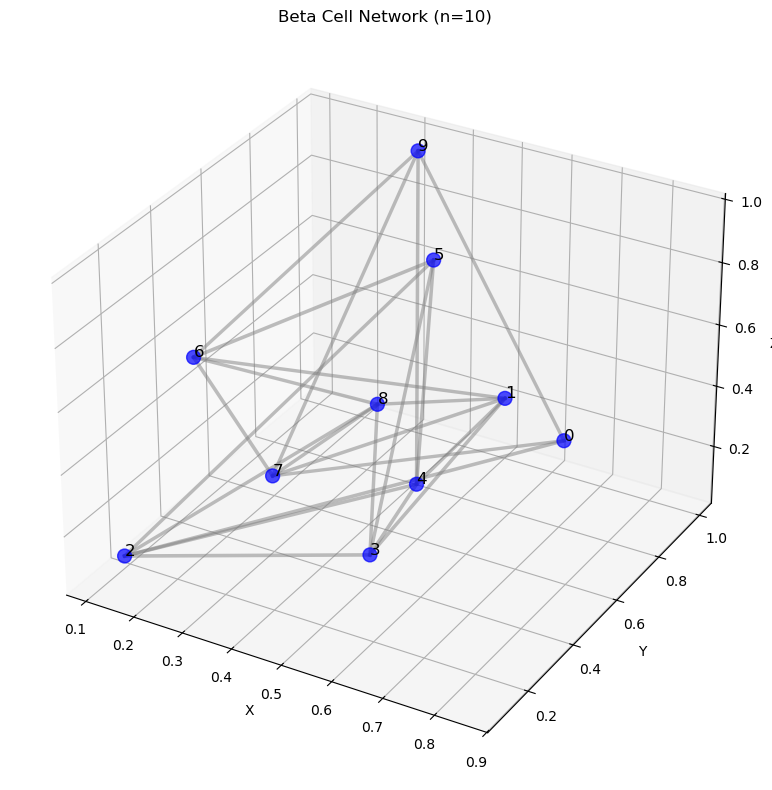

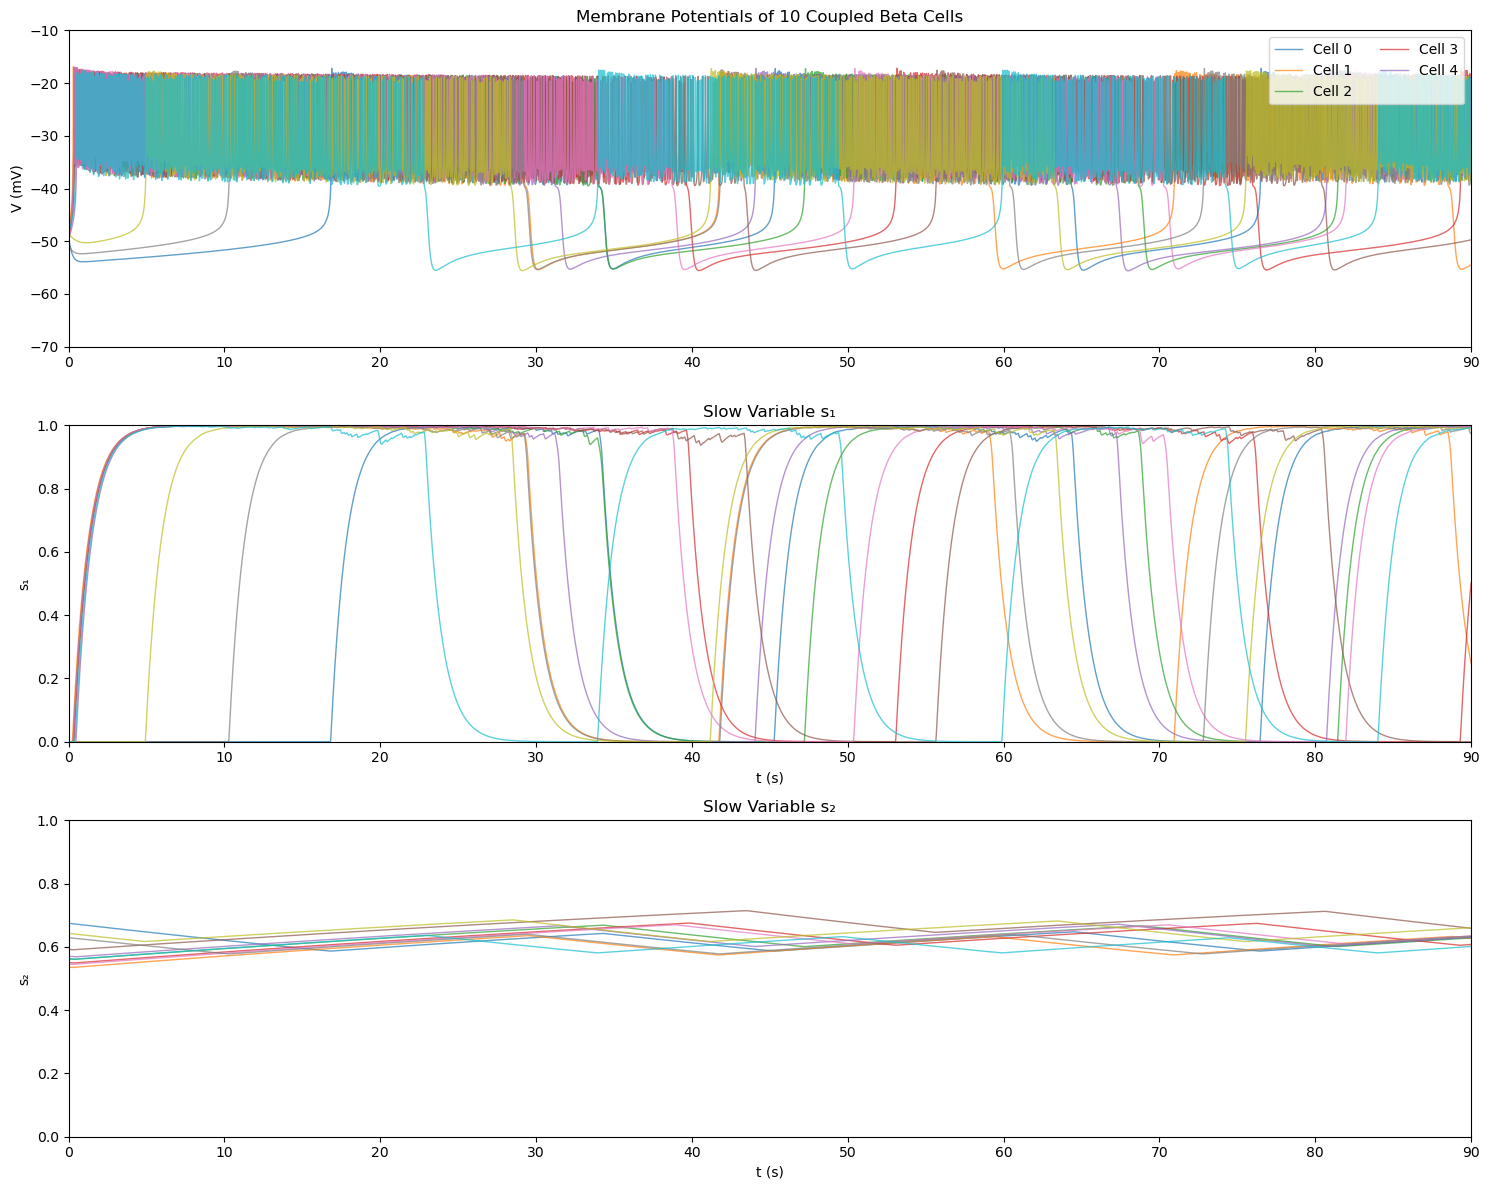

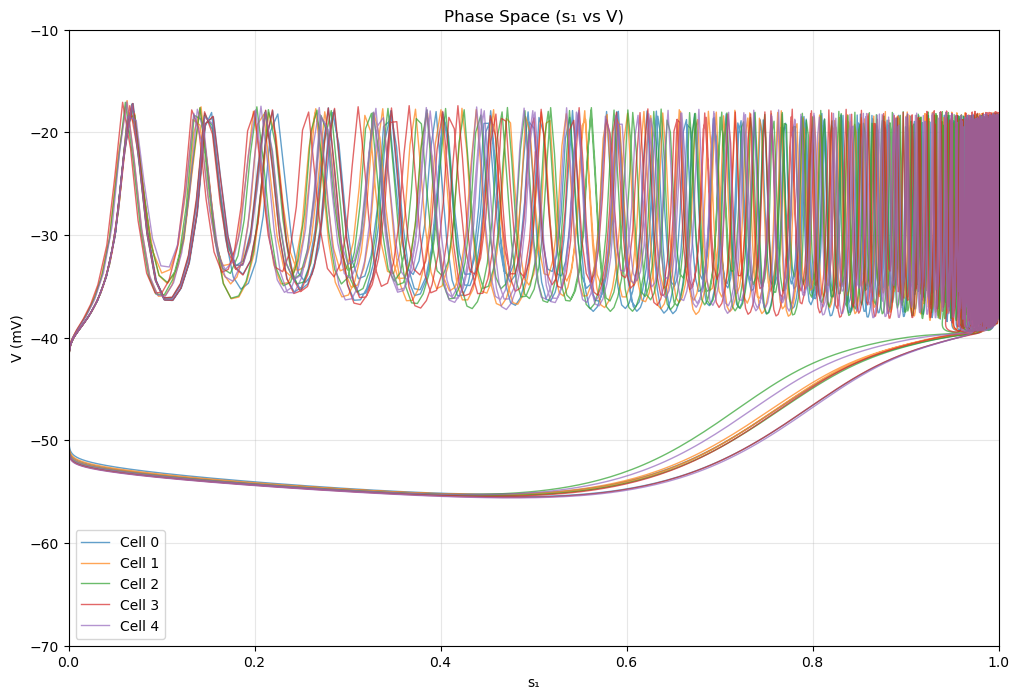

In [ ]:
def main():
    # Create a network of 10 beta cells
    network = BetaCellNetwork(
        num_cells=10, mean_gj=40, std_gj=1, min_connections=1, max_connections=5
    )

    # Visualize the network
    network.plot_network()

    # Simulate network dynamics
    sol = network.simulate(tmax=90000)

    # Plot results
    network.plot_results(sol)


main()